<a href="https://colab.research.google.com/github/RupeshBelhekar/test/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Height Weight (Simple Linear)

In [ ]:
# 1. Height Weight (Simple Linear)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

In [95]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("/content/weight-height.csv")
df

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(df['Height'], kde = True, color = 'green', bins = 20)
plt.xlabel('Height')
plt.title('Height')
plt.show()

plt.figure(figsize = (8,5))
sns.histplot(df['Weight'], kde = True, color = 'red', bins=  20)
plt.xlabel('Weight')
plt.title('Weight')
plt.show()

plt.figure(figsize = (8,5))
sns.scatterplot(data = df, x = 'Height', y = 'Weight', hue = 'Gender', alpha = 0.8)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight by Gender')
plt.show()

In [ ]:
cor_matrix = df[['Height','Weight']].corr()
print(cor_matrix)
plt.figure(figsize = (8,5))
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df['Height'].to_numpy().reshape(-1,1)
y = df['Weight'].to_numpy().reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
type(X_train), X_train.shape, X_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
print(regressor.coef_[0])
print(regressor.intercept_)


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(X_test, y_test, color = 'green', label = 'Actual')
plt.plot(X_test, y_pred, '-r', label = 'Predicted')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mean_y_test = np.mean(y_test)
percentage_accuracy = (1 - mae/mean_y_test)*100

print(f'Mean Squared Error : {mse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.2f}')
print(f'Percentage accuracy : {percentage_accuracy:.2f}')

# MAE measures the average absolute error between predictions and actual values. A lower MAE indicates better performance.
# R² Score indicates how well the model explains the variance in the data. Closer to 1 is better.
# Percentage Accuracy indicates how close the predictions are to the actual values.

# 2. Mammals (Multi Linear)

In [ ]:
# 2. Mammals (Multi Linear)
files.upload()

Saving mammals.csv to mammals.csv


{'mammals.csv': b'species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger\r\nAfricanelephant,6654,5712,NA,NA,3.3,38.6,645,3,5,3\r\nAfricangiantpouchedrat,1,6.6,6.3,2,8.3,4.5,42,3,1,3\r\nArcticFox,3.385,44.5,NA,NA,12.5,14,60,1,1,1\r\nArcticgroundsquirrel,0.92,5.7,NA,NA,16.5,NA,25,5,2,3\r\nAsianelephant,2547,4603,2.1,1.8,3.9,69,624,3,5,4\r\nBaboon,10.55,179.5,9.1,0.7,9.8,27,180,4,4,4\r\nBigbrownbat,0.023,0.3,15.8,3.9,19.7,19,35,1,1,1\r\nBraziliantapir,160,169,5.2,1,6.2,30.4,392,4,5,4\r\nCat,3.3,25.6,10.9,3.6,14.5,28,63,1,2,1\r\nChimpanzee,52.16,440,8.3,1.4,9.7,50,230,1,1,1\r\nChinchilla,0.425,6.4,11,1.5,12.5,7,112,5,4,4\r\nCow,465,423,3.2,0.7,3.9,30,281,5,5,5\r\nDeserthedgehog,0.55,2.4,7.6,2.7,10.3,NA,NA,2,1,2\r\nDonkey,187.1,419,NA,NA,3.1,40,365,5,5,5\r\nEasternAmericanmole,0.075,1.2,6.3,2.1,8.4,3.5,42,1,1,1\r\nEchidna,3,25,8.6,0,8.6,50,28,2,2,2\r\nEuropeanhedgehog,0.785,3.5,6.6,4.1,10.7,6,42,2,2,2\r\nGalago,0.2,5,9.5,1.2,10.7,10.4,120,2,

In [ ]:
df = pd.read_csv("/content/mammals.csv")
df

species   body_wt  brain_wt  non_dreaming  dreaming  \
0          Africanelephant  6654.000    5712.0           NaN       NaN   
1   Africangiantpouchedrat     1.000       6.6           6.3       2.0   
2                ArcticFox     3.385      44.5           NaN       NaN   
3     Arcticgroundsquirrel     0.920       5.7           NaN       NaN   
4            Asianelephant  2547.000    4603.0           2.1       1.8   
..                     ...       ...       ...           ...       ...   
57               Treehyrax     2.000      12.3           4.9       0.5   
58               Treeshrew     0.104       2.5          13.2       2.6   
59                  Vervet     4.190      58.0           9.7       0.6   
60            Wateropossum     3.500       3.9          12.8       6.6   
61    Yellow-belliedmarmot     4.050      17.0           NaN       NaN   

    total_sleep  life_span  gestation  predation  exposure  danger  
0           3.3       38.6      645.0          3         5       3  
1           8.3        4.5       42.0          3         1       3  
2          12.5       14.0       60.0          1         1       1  
3          16.5        NaN       25.0          5         2       3  
4           3.9       69.0      624.0          3         5       4  
..          ...        ...        ...        ...       ...     ...  
57          5.4        7.5      200.0          3         1       3  
58         15.8        2.3       46.0          3         2       2  
59         10.3       24.0      210.0          4         3       4  
60         19.4        3.0       14.0          2         1       1  
61          NaN       13.0       38.0          3         1       1  

[62 rows x 11 columns]

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

species   body_wt  brain_wt  non_dreaming  dreaming  \
0         Africanelephant  6654.000    5712.0           NaN       NaN   
1  Africangiantpouchedrat     1.000       6.6           6.3       2.0   
2               ArcticFox     3.385      44.5           NaN       NaN   
3    Arcticgroundsquirrel     0.920       5.7           NaN       NaN   
4           Asianelephant  2547.000    4603.0           2.1       1.8   

   total_sleep  life_span  gestation  predation  exposure  danger  
0          3.3       38.6      645.0          3         5       3  
1          8.3        4.5       42.0          3         1       3  
2         12.5       14.0       60.0          1         1       1  
3         16.5        NaN       25.0          5         2       3  
4          3.9       69.0      624.0          3         5       4

In [ ]:
df.describe()

body_wt     brain_wt  non_dreaming   dreaming  total_sleep  \
count    62.000000    62.000000     48.000000  50.000000    58.000000   
mean    198.789984   283.134194      8.672917   1.972000    10.532759   
std     899.158011   930.278942      3.666452   1.442651     4.606760   
min       0.005000     0.140000      2.100000   0.000000     2.600000   
25%       0.600000     4.250000      6.250000   0.900000     8.050000   
50%       3.342500    17.250000      8.350000   1.800000    10.450000   
75%      48.202500   166.000000     11.000000   2.550000    13.200000   
max    6654.000000  5712.000000     17.900000   6.600000    19.900000   

        life_span   gestation  predation   exposure     danger  
count   58.000000   58.000000  62.000000  62.000000  62.000000  
mean    19.877586  142.353448   2.870968   2.419355   2.612903  
std     18.206255  146.805039   1.476414   1.604792   1.441252  
min      2.000000   12.000000   1.000000   1.000000   1.000000  
25%      6.625000   35.750000   2.000000   1.000000   1.000000  
50%     15.100000   79.000000   3.000000   2.000000   2.000000  
75%     27.750000  207.500000   4.000000   4.000000   4.000000  
max    100.000000  645.000000   5.000000   5.000000   5.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       62 non-null     object 
 1   body_wt       62 non-null     float64
 2   brain_wt      62 non-null     float64
 3   non_dreaming  48 non-null     float64
 4   dreaming      50 non-null     float64
 5   total_sleep   58 non-null     float64
 6   life_span     58 non-null     float64
 7   gestation     58 non-null     float64
 8   predation     62 non-null     int64  
 9   exposure      62 non-null     int64  
 10  danger        62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
print(df.isnull().sum())

species          0
body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64


In [ ]:
df['non_dreaming'] = df['non_dreaming'].fillna(df['non_dreaming'].mode()[0])
df['dreaming'] = df['dreaming'].fillna(df['dreaming'].mode()[0])
df['total_sleep'] = df['total_sleep'].fillna(df['total_sleep'].mean())
df['life_span'] = df['life_span'].fillna(df['life_span'].mean())
df['gestation'] = df['gestation'].fillna(df['gestation'].mean())

In [ ]:
print(df.isnull().sum())

species         0
body_wt         0
brain_wt        0
non_dreaming    0
dreaming        0
total_sleep     0
life_span       0
gestation       0
predation       0
exposure        0
danger          0
dtype: int64


In [ ]:
df = df[['body_wt', 'brain_wt', 'non_dreaming', 'dreaming',
       'total_sleep', 'life_span', 'gestation', 'predation', 'exposure',
       'danger']]

In [ ]:
df.head()

body_wt  brain_wt  non_dreaming  dreaming  total_sleep  life_span  \
0  6654.000    5712.0          11.0       0.5          3.3  38.600000   
1     1.000       6.6           6.3       2.0          8.3   4.500000   
2     3.385      44.5          11.0       0.5         12.5  14.000000   
3     0.920       5.7          11.0       0.5         16.5  19.877586   
4  2547.000    4603.0           2.1       1.8          3.9  69.000000   

   gestation  predation  exposure  danger  
0      645.0          3         5       3  
1       42.0          3         1       3  
2       60.0          1         1       1  
3       25.0          5         2       3  
4      624.0          3         5       4

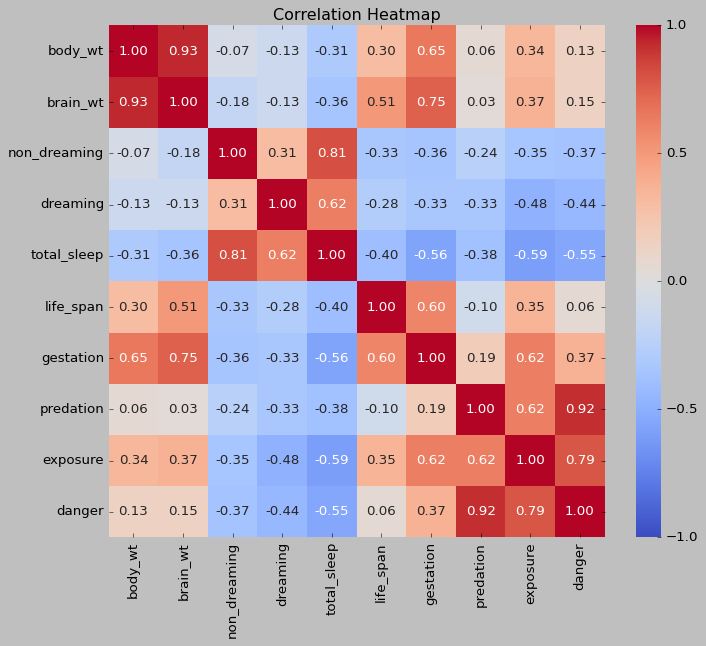

In [ ]:
import seaborn as sns
cor_mat = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = cor_mat, annot = True,fmt = '.2f',cmap = 'coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['body_wt'] = np.log(df['body_wt'])
df['brain_wt'] = np.log(df['brain_wt'])

<ipython-input-81-d5e84580c8f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body_wt'] = np.log(df['body_wt'])
<ipython-input-81-d5e84580c8f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brain_wt'] = np.log(df['brain_wt'])


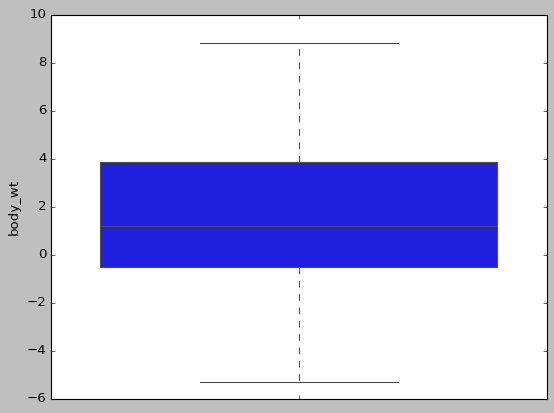

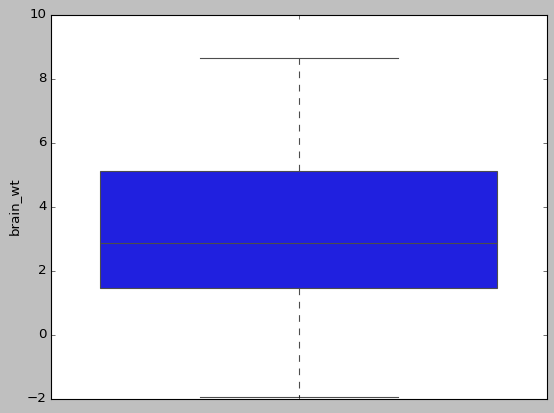

In [ ]:
sns.boxplot(data = df['body_wt'])
plt.show()

sns.boxplot(data = df['brain_wt'])
plt.show()

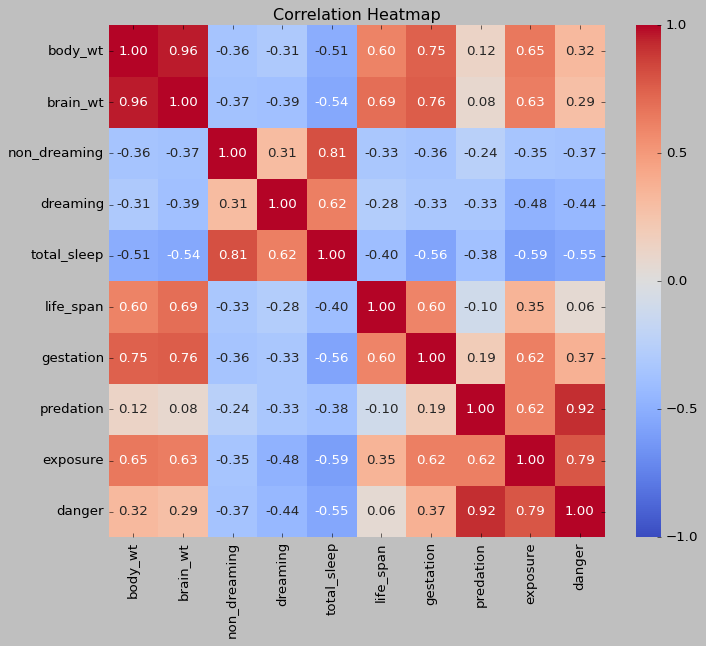

In [ ]:
cor_mat = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = cor_mat, annot = True,fmt = '.2f',cmap = 'coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.columns

Index(['body_wt', 'brain_wt', 'non_dreaming', 'dreaming', 'total_sleep',
       'life_span', 'gestation', 'predation', 'exposure', 'danger'],
      dtype='object')

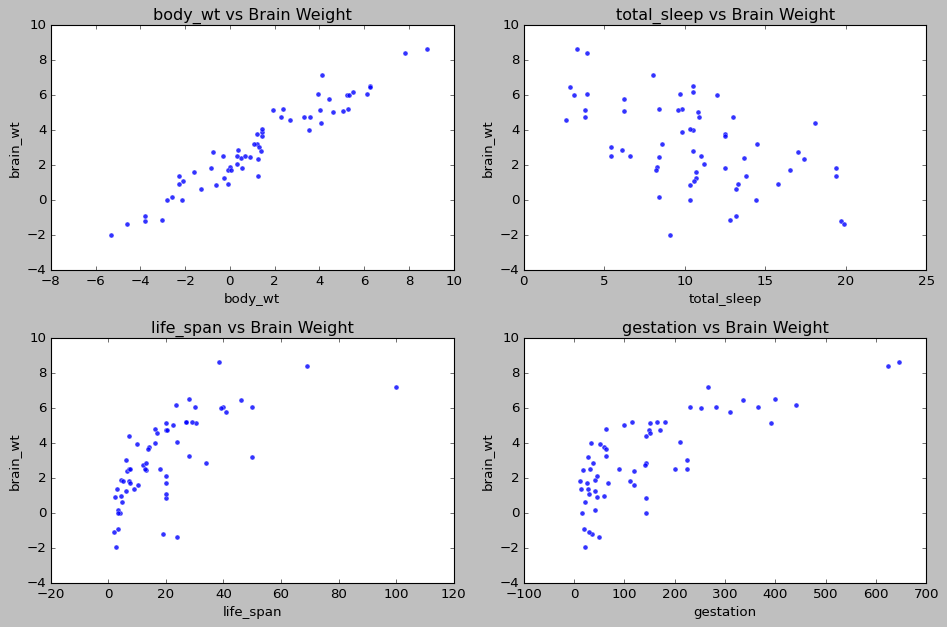

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
features = ['body_wt', 'total_sleep', 'life_span', 'gestation']

for i, feature in enumerate(features):
    ax = axs[i//2, i%2]
    sns.scatterplot(data=df, x=feature, y='brain_wt', ax=ax, alpha=0.8)
    ax.set_title(f'{feature} vs Brain Weight')

plt.tight_layout()
plt.show()


In [ ]:
X = df.iloc[:,[0,4,5,6]].to_numpy()
y = df.iloc[:,[1]].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_std).describe().round(2)

0      1      2      3
count  62.00  62.00  62.00  62.00
mean   -0.00   0.00  -0.00  -0.00
std     1.01   1.01   1.01   1.01
min    -2.14  -1.80  -1.02  -0.93
25%    -0.60  -0.52  -0.74  -0.73
50%    -0.04   0.00  -0.18  -0.26
75%     0.82   0.59   0.41   0.37
max     2.41   2.12   4.59   3.57

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
regre_2 = LinearRegression()
regre_2.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regre_2.coef_[0])
print(regre_2.intercept_)

[ 1.95505164 -0.11282132  0.37720176  0.06782977]
[3.11833535]


In [ ]:
y_pred = regre_2.predict(X_test)

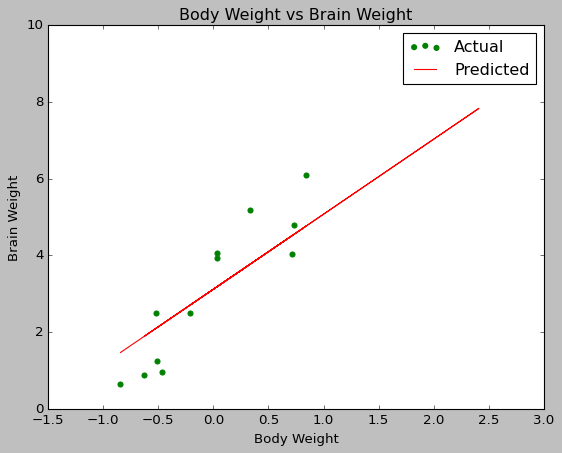

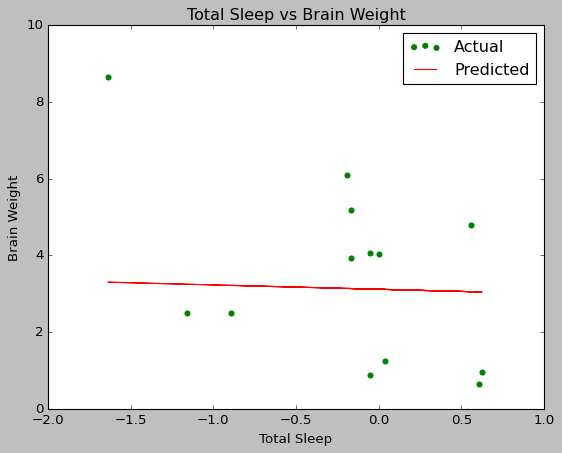

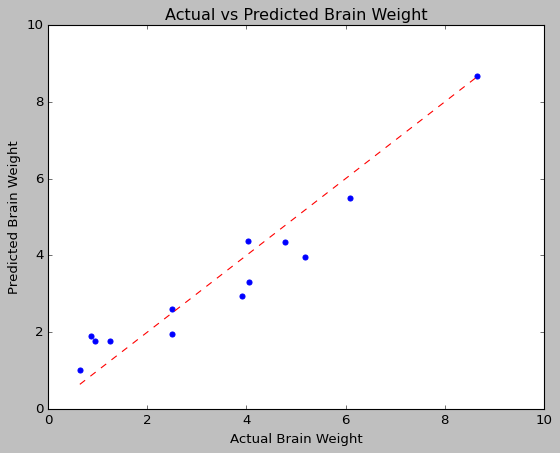

In [ ]:
plt.scatter(X_test[:, 0], y_test, color = 'green', label = 'Actual')
plt.plot(X_test[:, 0], regre_2.coef_[0,0]*X_test[:, 0] + regre_2.intercept_, '-r', label = 'Predicted')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.title('Body Weight vs Brain Weight')
plt.legend()
plt.show()

plt.scatter(X_test[:, 1], y_test, color = 'green', label = 'Actual')
plt.plot(X_test[:, 1], regre_2.coef_[0,1]*X_test[:, 1] + regre_2.intercept_, '-r', label = 'Predicted')
plt.xlabel('Total Sleep')
plt.ylabel('Brain Weight')
plt.title('Total Sleep vs Brain Weight')
plt.legend()
plt.show()

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Brain Weight')
plt.ylabel('Predicted Brain Weight')
plt.title('Actual vs Predicted Brain Weight')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mean_y_test = np.mean(y_test)
accuracy_precentage = (1 - mae / mean_y_test)*100

print(f'Mean Squared Error : {mse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.2f}')
print(f'Accuracy Percentage : {accuracy_precentage:.2f}')

# MAE measures the average absolute error between predictions and actual values. A lower MAE indicates better performance.
# R² Score indicates how well the model explains the variance in the data. Closer to 1 is better.

Mean Squared Error : 0.47
Mean Absolute Error : 0.60
R2 Score : 0.91
Accuracy Percentage : 82.96


# Housing (Multi Linear Practice)

In [ ]:
# Housing (Multi Linear Practice)
df = pd.read_csv('/content/Housing.csv')
df = pd.DataFrame(df)
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

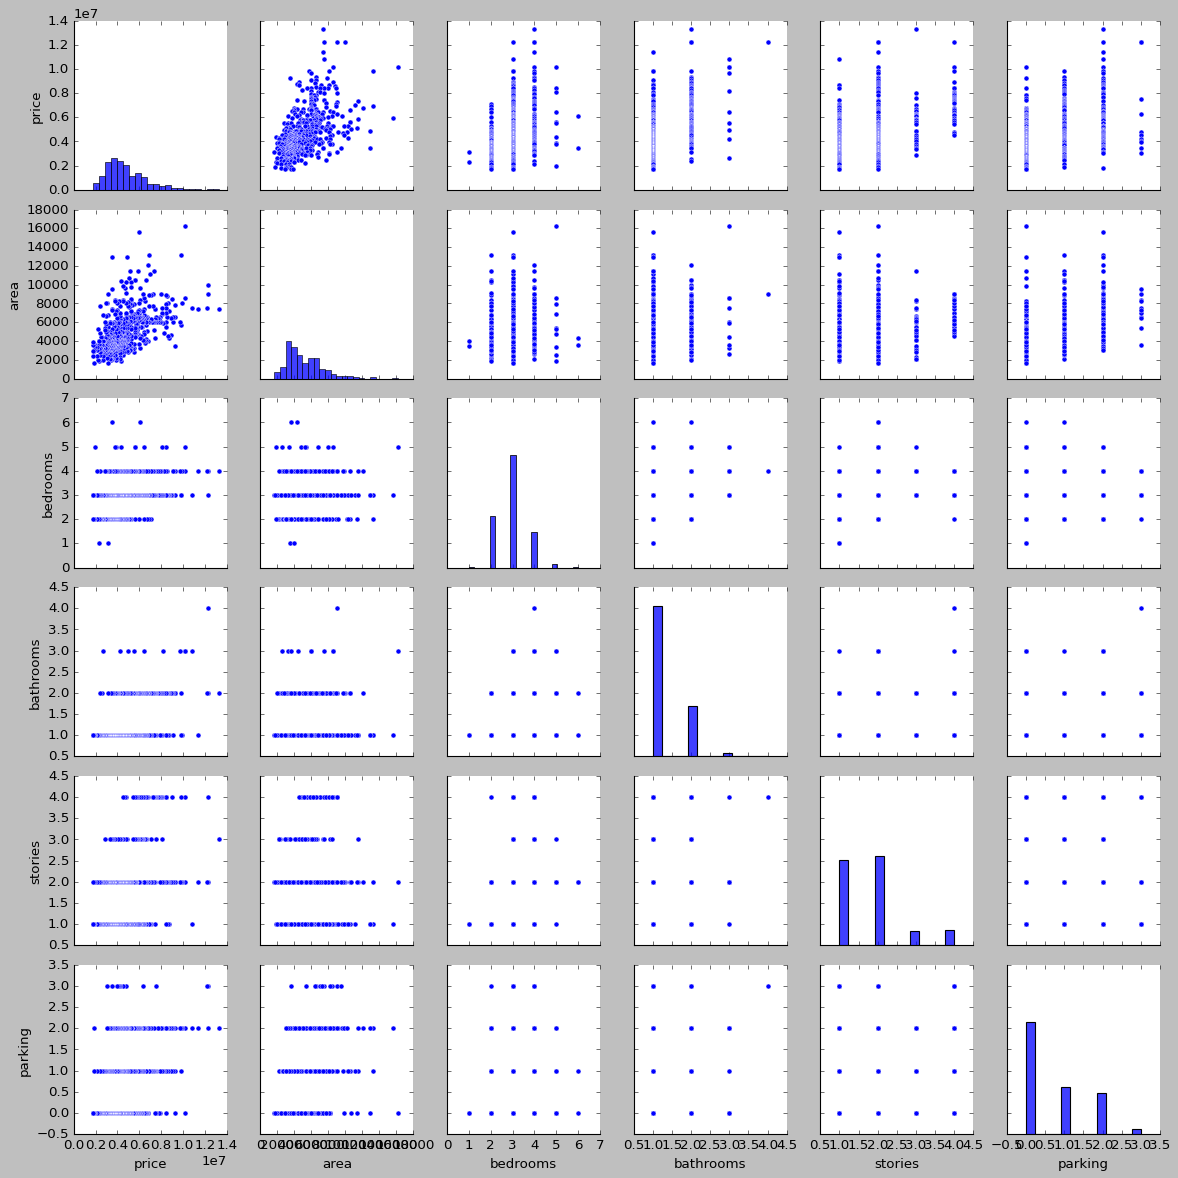

In [ ]:
sns.pairplot(df)
plt.show()

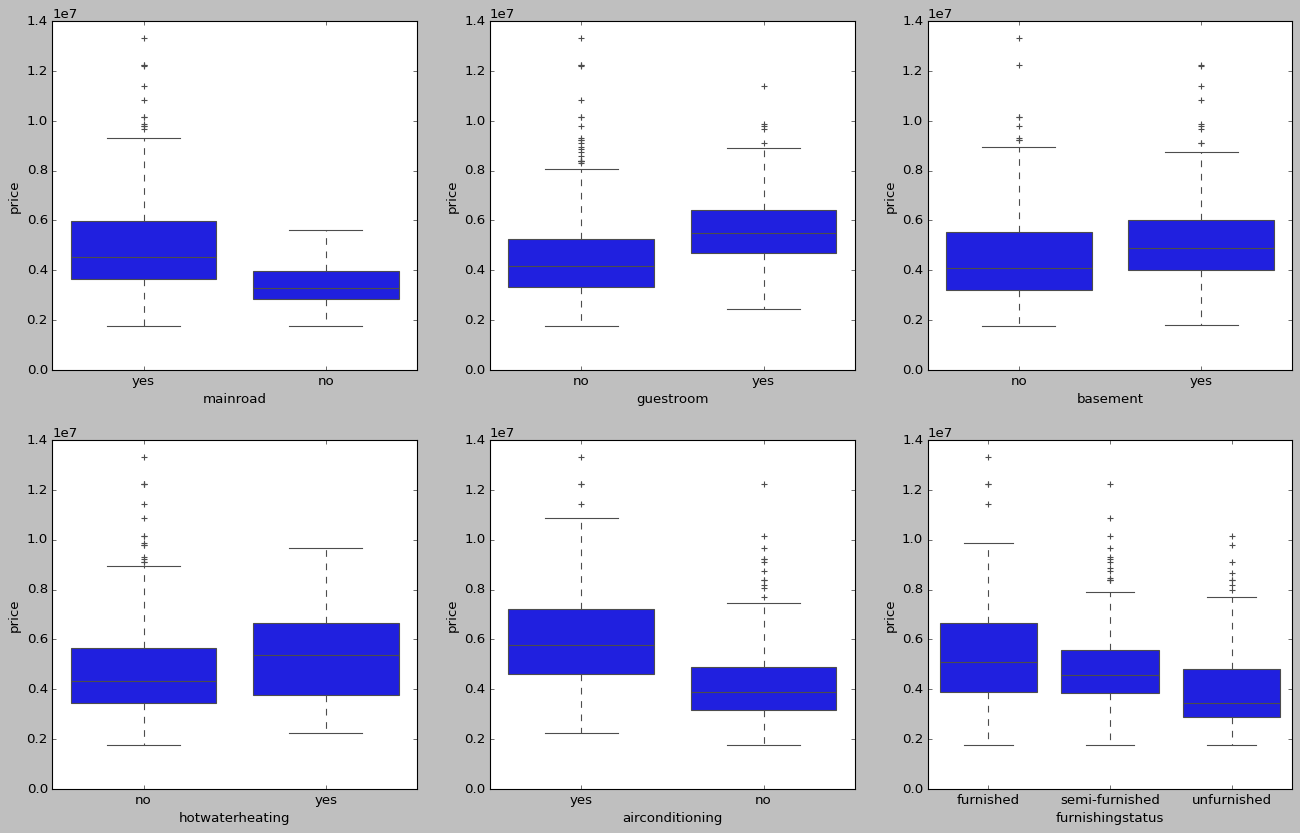

In [ ]:
# mainroad	guestroom	basement	hotwaterheating	airconditioning	prefarea furnishingstatus
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'mainroad', y = 'price')
plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'guestroom', y = 'price')
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'basement', y = 'price')
plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'hotwaterheating', y = 'price')
plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'airconditioning', y = 'price')
plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'furnishingstatus', y = 'price')
plt.show()


In [ ]:
# mainroad	guestroom	basement	hotwaterheating	airconditioning	prefarea
varlist = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binarymap(x):
  return x.map({'yes':1, 'no':0})

df[varlist] = df[varlist].apply(binarymap)

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [ ]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
status.head()

semi-furnished  unfurnished
0           False        False
1           False        False
2            True        False
3           False        False
4           False        False

In [ ]:
df = pd.concat([df,status],axis = 1)

In [ ]:
df = df.drop('furnishingstatus',axis = 1)
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0           False        False  
1           False        False  
2            True        False  
3           False        False  
4           False        False

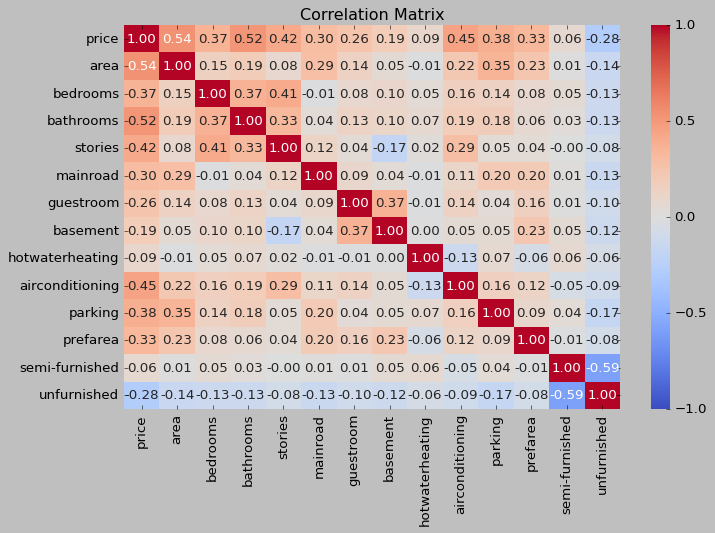

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(data=corr_matrix, annot = True, fmt = '.2f', vmax  = 1, vmin = -1, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X = df.iloc[:,[1,2,3,9]].to_numpy()
y = df.iloc[:,[0]].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train).describe().round(2)

0       1       2       3
count  436.00  436.00  436.00  436.00
mean     0.00    0.00    0.00   -0.00
std      1.00    1.00    1.00    1.00
min     -1.59   -2.62   -0.56   -0.67
25%     -0.71   -1.28   -0.56   -0.67
50%     -0.30    0.06   -0.56   -0.67
75%      0.55    0.06    1.54    1.50
max      5.02    4.07    5.73    1.50

In [ ]:
from sklearn.linear_model import LinearRegression
regre_3 = LinearRegression()
regre_3.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regre_3.coef_[0].round(2))
print(regre_3.intercept_.round(2))

[673965.95 204571.3  612605.32 509708.78]
[4706527.39]


In [ ]:
y_pred = regre_3.predict(X_test)

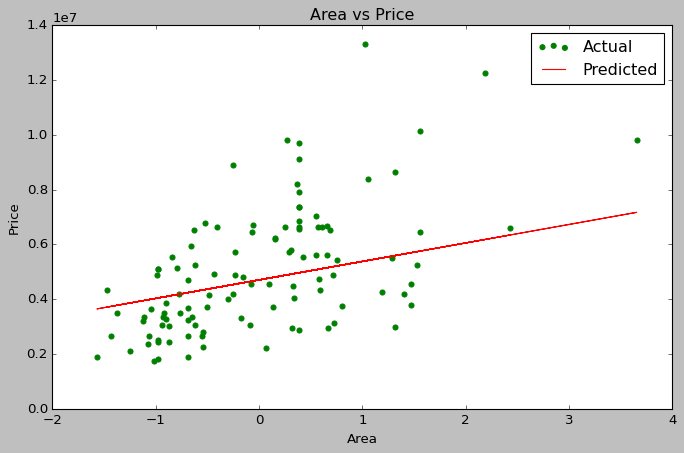

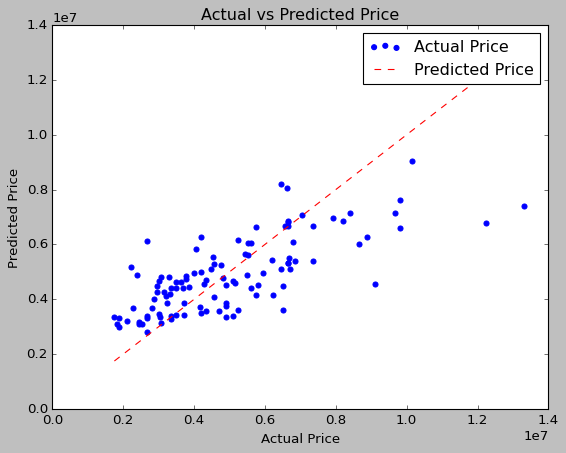

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:, 0],y_test, color = 'green', label = 'Actual')
plt.plot(X_test[:, 0], regre_3.coef_[0,0]*X_test[:, 0] + regre_3.intercept_, '-r', label = 'Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.legend()
plt.show()


plt.scatter(y_test, y_pred, color = 'blue', label = 'Actual Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = 'Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mean_y_test = np.mean(y_test)
accuracy_precentage = (1 - mae / mean_y_test) * 100

print(f'Mean Squared Error : {mse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.2f}')
print(f'Accuracy Percentage : {accuracy_precentage:.2f}')

Mean Squared Error : 2420118654049.47
Mean Absolute Error : 1183793.11
R2 Score : 0.52
Accuracy Percentage : 76.36


# 3. Boston House Price (Multi Linear)

In [13]:
# 3. Boston House Price (Multi Linear)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [5]:
from google.colab import files
files.upload()

Saving boston.csv to boston.csv


{'boston.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\n0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00\n0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60\n0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70\n0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40\n0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20\n0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70\n0.08829,12.50,7.870,0,0.5240,6.0120,66.60,5.5605,5,311.0,15.20,395.60,12.43,22.90\n0.14455,12.50,7.870,0,0.5240,6.1720,96.10,5.9505,5,311.0,15.20,396.90,19.15,27.10\n0.21124,12.50,7.870,0,0.5240,5.6310,100.00,6.0821,5,311.0,15.20,386.63,29.93,16.50\n0.17004,12.50,7.870,0,0.5240,6.0040,85.90,6.5921,5,311.0,15.20,386.71,17.10,18.90\n0.22489,12.50,7.870,0,0.5240,6.3770,94.30,6.3467,5,311.0,15.20,392.52,20.45,15.00\n0.11747,12.50,7.

In [6]:
df = pd.read_csv('/content/boston.csv')
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [7]:
df = pd.DataFrame(df)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

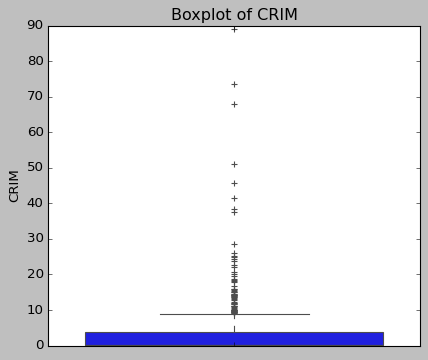

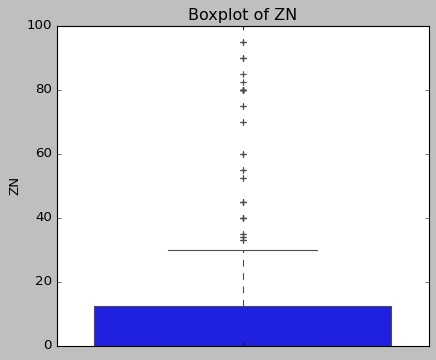

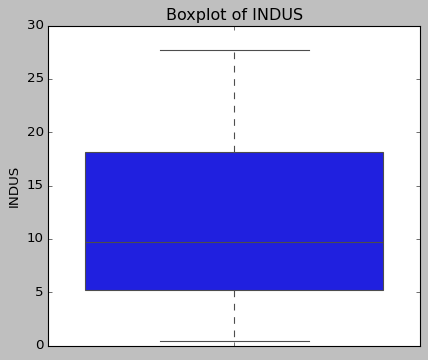

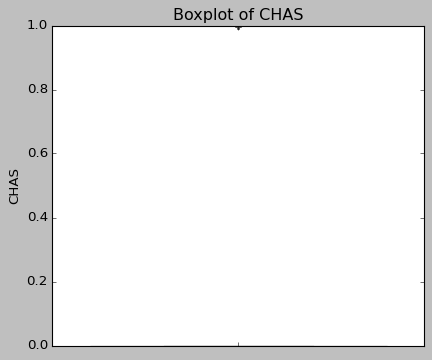

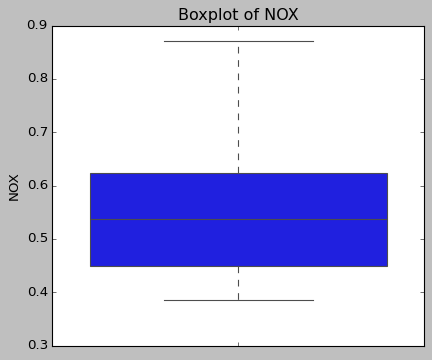

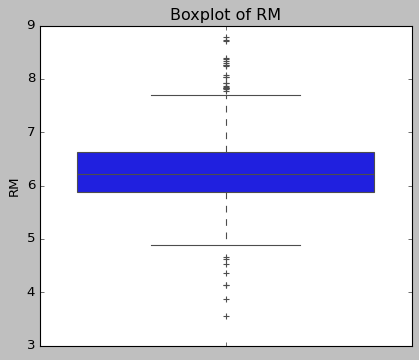

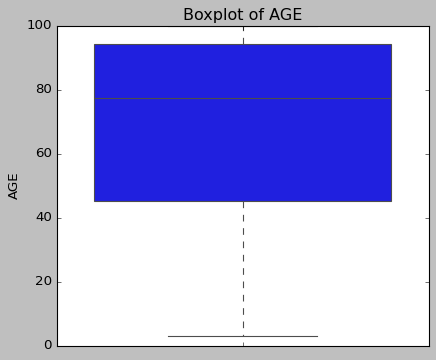

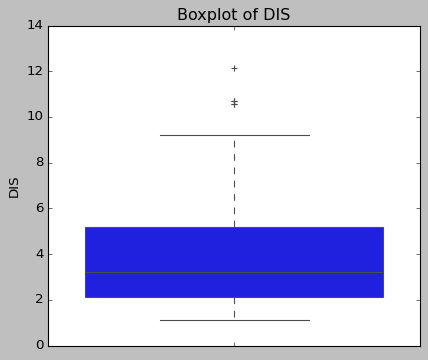

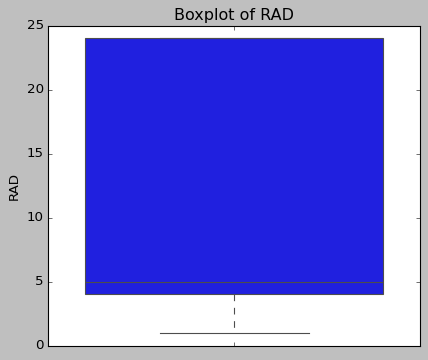

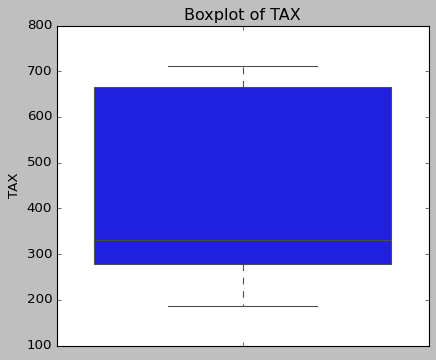

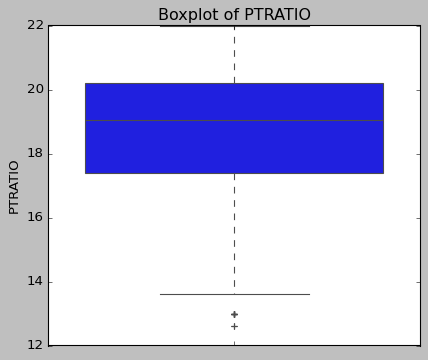

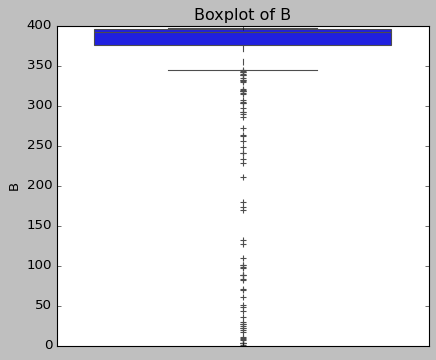

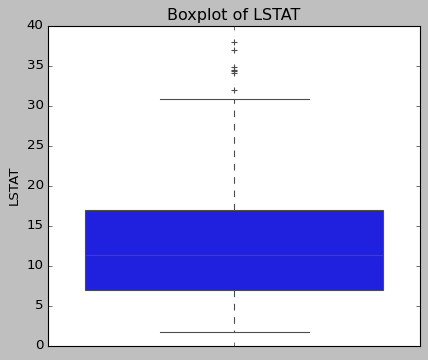

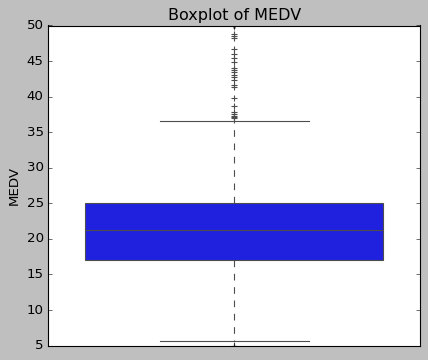

In [14]:
for col in df.columns:
  plt.figure(figsize = (6,5))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [15]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor
regre_4 = RandomForestRegressor()
regre_4.fit(X_train_std, y_train)

RandomForestRegressor()

In [32]:
y_pred = regre_4.predict(X_test_std)

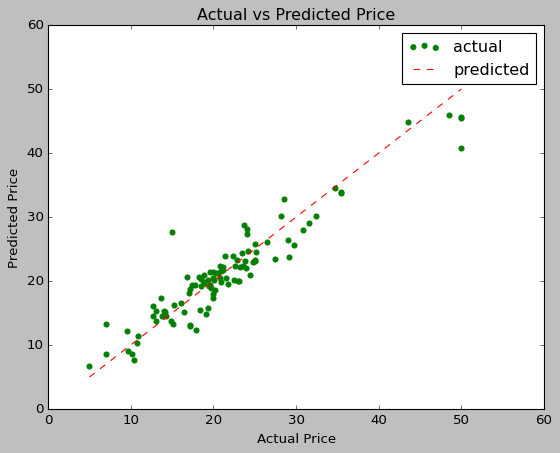

In [34]:
plt.scatter(y_test, y_pred, color = 'green', label = 'actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mean_y_test = np.mean(y_test)
accuracy_percentage = (1-mae/mean_y_test)*100

print(f'Mean Squared Error : {mse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.2f}')
print(f'Accuracy Percentage : {accuracy_percentage:.2f}')

Mean Squared Error : 7.95
Mean Absolute Error : 2.11
R2 Score : 0.89
Accuracy Percentage : 90.19


# 4. BankNote Authentication(Random Forest Classifier)

In [2]:
# 4. BankNote Authentication(Random Forest Classifier)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

In [4]:
df= pd.read_csv('/content/BankNoteAuthentication.csv')
df = pd.DataFrame(df)
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

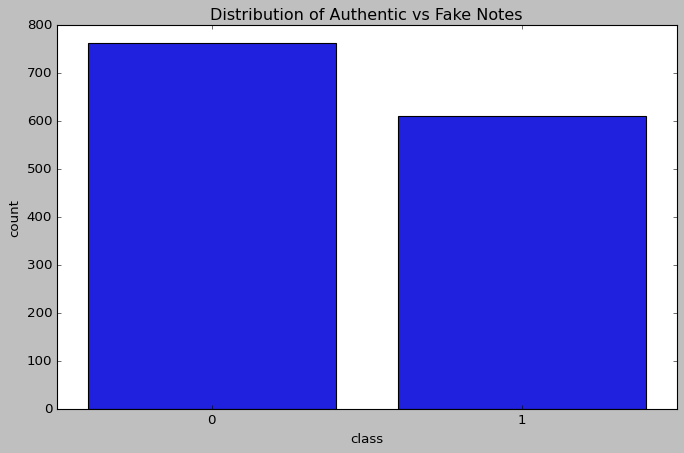

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'class', data = df)
plt.title('Distribution of Authentic vs Fake Notes')
plt.show()

<Figure size 800x480 with 0 Axes>

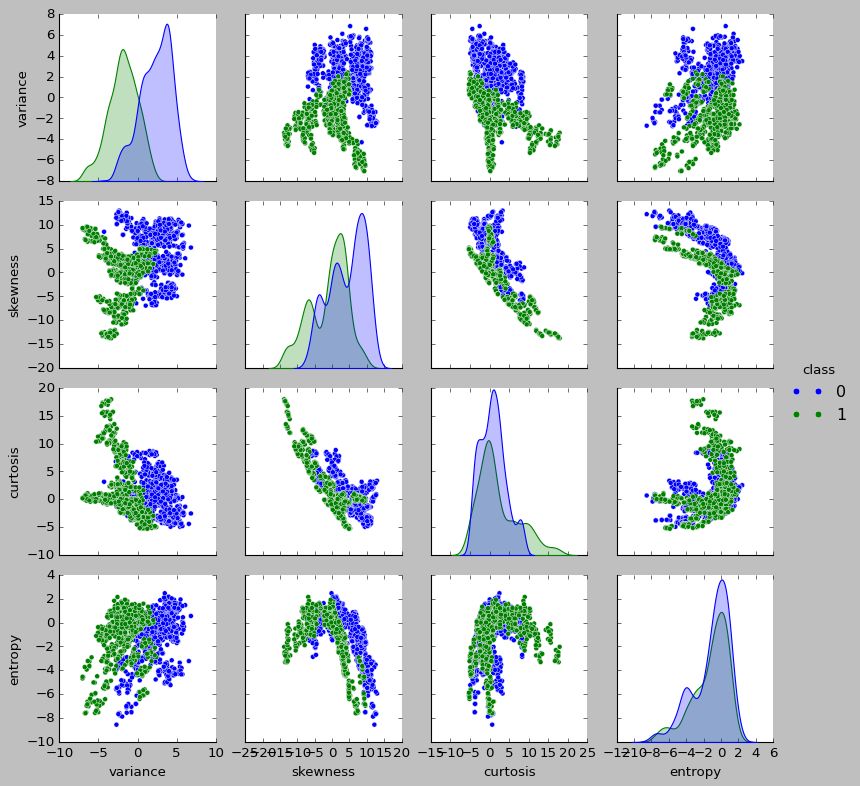

In [8]:
plt.figure(figsize = (10,6))
sns.pairplot(df, hue = 'class', diag_kind = 'kde')
plt.show()

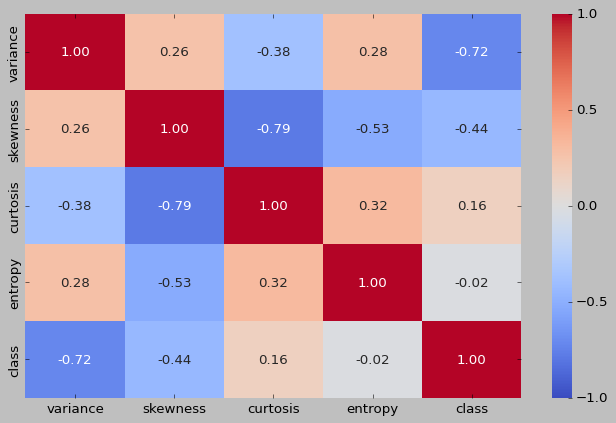

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', vmin = -1 , vmax = 1)
plt.show()

In [12]:
X = df.drop('class', axis = 1)
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [19]:
y_hat = classifier.predict(X_test_scaled)

Confusion Matrix : 
[[229   0]
 [  2 181]]


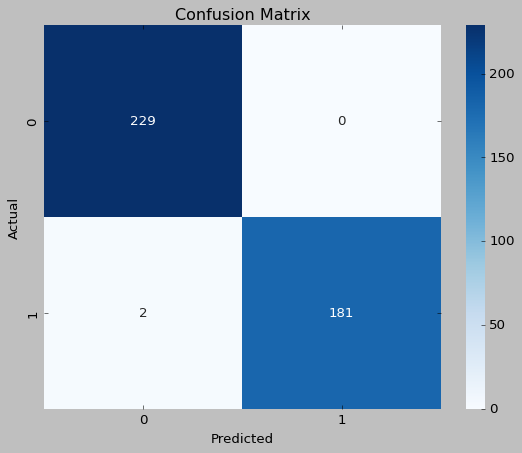

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
#Evaluate the model
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_hat))
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print("Classification Report: ")
report = pd.DataFrame(classification_report(y_test, y_hat, output_dict = True))
report.transpose().round(2)

Classification Report: 


precision  recall  f1-score  support
0                  0.99    1.00      1.00    229.0
1                  1.00    0.99      0.99    183.0
accuracy           1.00    1.00      1.00      1.0
macro avg          1.00    0.99      1.00    412.0
weighted avg       1.00    1.00      1.00    412.0

In [36]:
print(f'Accuracy: {accuracy_score(y_test, y_hat)*100:.2f}%')

Accuracy: 99.51%


# 5. K-Means (Silhouette Score)



In [37]:
# 5. K-Means (Silhouette Score)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [38]:
df = pd.read_csv('/content/Mall_Customers.csv')
df = pd.DataFrame(df)
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

<Figure size 800x480 with 0 Axes>

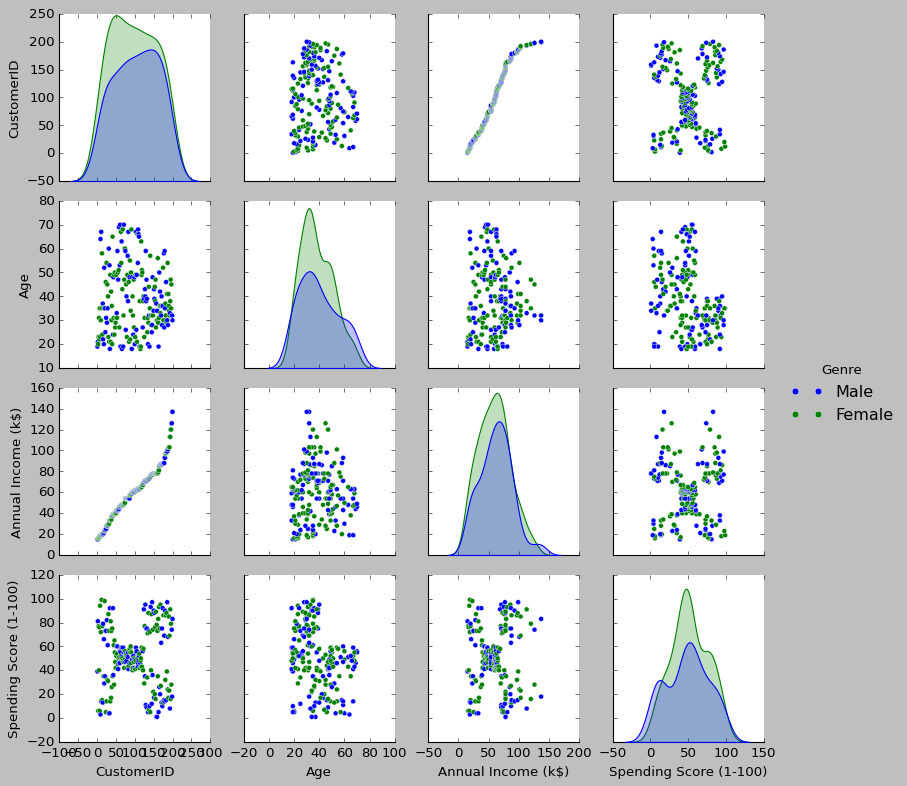

In [43]:
plt.figure(figsize = (10,6))
sns.pairplot(df, hue = 'Genre')
plt.show()

In [45]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Find the optimal number of clusters using Silhouette score
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters = k, n_init = 12, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f'For k = {k}, Silhouette Score : {silhouette_score(X_scaled, kmeans.labels_):.4f}')

For k = 2, Silhouette Score : 0.3355
For k = 3, Silhouette Score : 0.3578
For k = 4, Silhouette Score : 0.4040
For k = 5, Silhouette Score : 0.4166
For k = 6, Silhouette Score : 0.4274
For k = 7, Silhouette Score : 0.4172
For k = 8, Silhouette Score : 0.4082
For k = 9, Silhouette Score : 0.4177
For k = 10, Silhouette Score : 0.4066


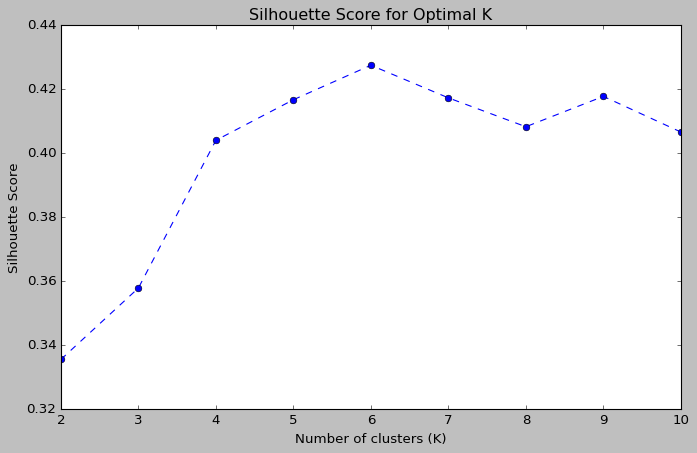

In [56]:
# Plot Silhouette Score
plt.figure(figsize = (10,6))
plt.plot(cluster_range, silhouette_scores, marker = 'o', linestyle = '--', color = 'b')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [75]:
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K) : {optimal_k}")

Optimal number of clusters (K) : 6


In [76]:
kmeans = KMeans(n_clusters = optimal_k, n_init = 12, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [77]:
df

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          5  
3          2  
4          5  
..       ...  
195        3  
196        0  
197        3  
198        0  
199        3  

[200 rows x 6 columns]

In [78]:
kmeans.cluster_centers_

array([[ 0.22171558,  1.08322527, -1.29005223],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.97602698, -1.32549704,  1.0371827 ],
       [-0.44191719,  0.99158305,  1.23950275],
       [-0.87309844, -0.11378508, -0.09358039],
       [ 0.47895722, -1.30822992, -1.19644353]])

In [80]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

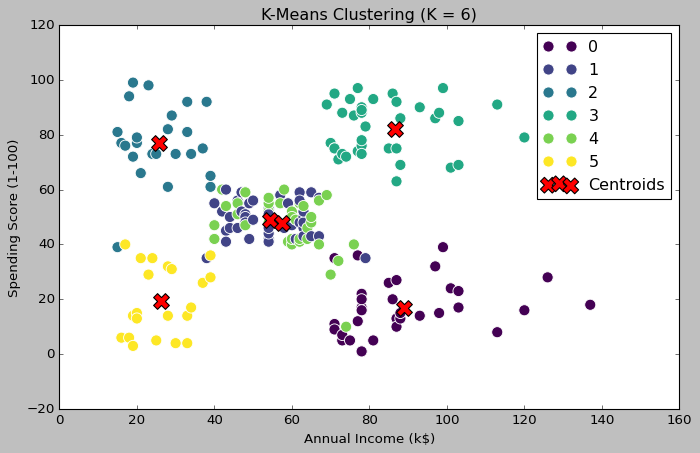

In [81]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', palette = 'viridis', s = 100)
plt.scatter(centroids[:, 1], centroids[:, 2], c = 'red', marker = 'X', label = 'Centroids', s = 200)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (K = {optimal_k})')
plt.legend()
plt.show()

# 6. K-Means (Elbow Clustering)

In [97]:
# 6. K-Means (Elbow Clustering)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('classic')

In [90]:
df = pd.DataFrame(pd.read_csv('/content/Mall_Customers.csv'))
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [92]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [94]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


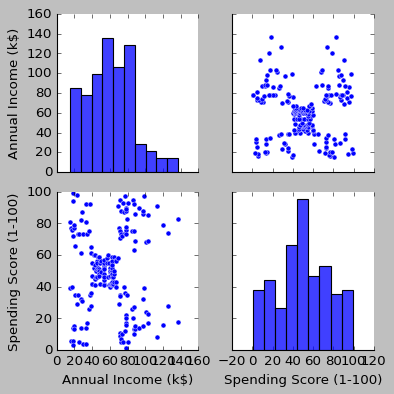

In [114]:
sns.pairplot(df[['Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [99]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
# Elbow Method to determing optimal number of clusters

from sklearn.cluster import KMeans
wss = [] # Within-Cluster Sum of Squares(WSS)
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters = k, n_init = 12, random_state = 42)
  kmeans.fit(X_scaled)
  wss.append(kmeans.inertia_)  #Store inertia value for given K
  print(f'For k = {k}, WSS = {kmeans.inertia_}')

For k = 1, WSS = 399.99999999999994
For k = 2, WSS = 269.69101219276405
For k = 3, WSS = 157.70400815035939
For k = 4, WSS = 108.92131661364358
For k = 5, WSS = 65.56840815571681
For k = 6, WSS = 55.057348270385965
For k = 7, WSS = 44.86475569922555
For k = 8, WSS = 37.22818767758587
For k = 9, WSS = 32.39226763033118
For k = 10, WSS = 29.685787841036305


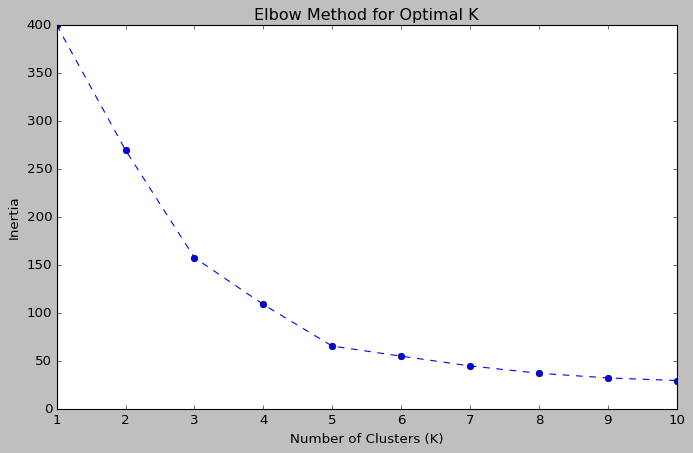

In [102]:
# Plot Elbow Method to visualize the optimal number of clusters
plt.figure(figsize = (10,6))
plt.plot(k_range, wss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [103]:
# Choose optimal value of K from above Elbow Method (assume K = 5)
k_optimal = 5
kmeans = KMeans(n_clusters = k_optimal, n_init = 12, random_state = 12)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          0  
1          4  
2          0  
3          4  
4          0  
..       ...  
195        3  
196        2  
197        3  
198        2  
199        3  

[200 rows x 6 columns]

In [105]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

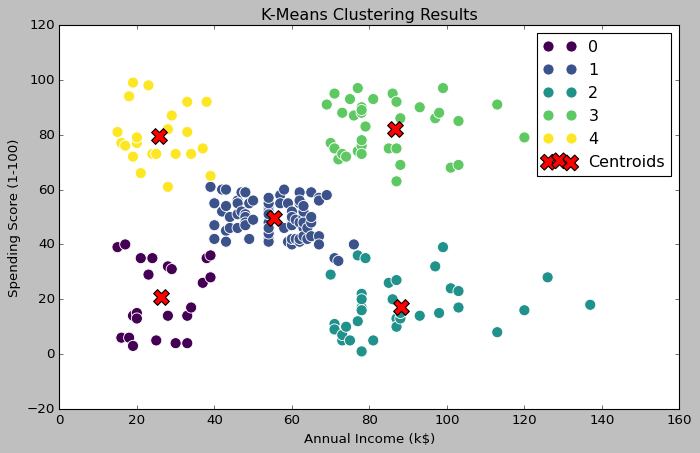

In [109]:
# Visualizing clustered data
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', palette = 'viridis', s = 100)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = 'X', label = 'Centroids', s = 200)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

# 7. E1 Classification (Model Comparision) Heart Disease

In [115]:
# 7. E1 Classification (Model Comparision) Heart Disease
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [116]:
df = pd.read_csv('/content/heart.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [117]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [119]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

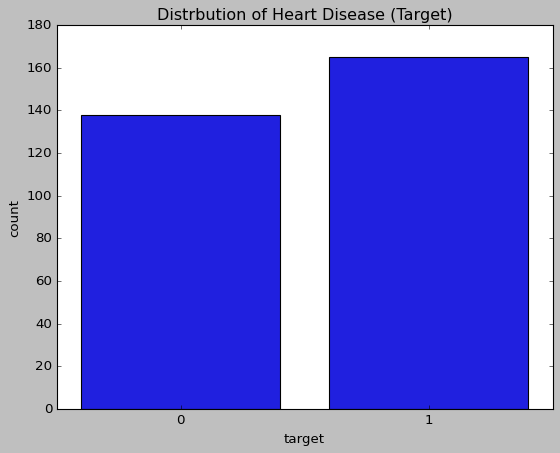

In [122]:
sns.countplot(x = 'target', data = df)
plt.title('Distrbution of Heart Disease (Target)')
plt.show()

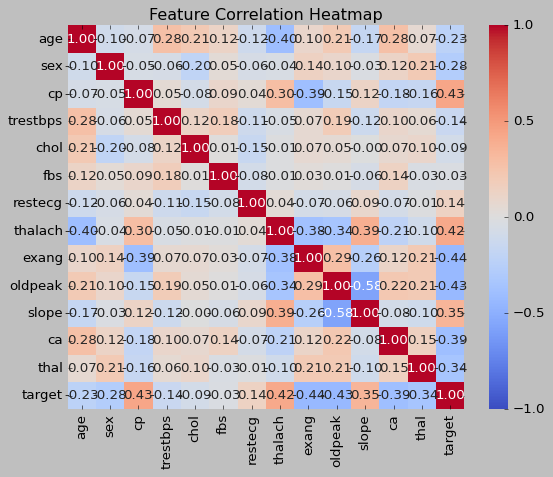

In [123]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

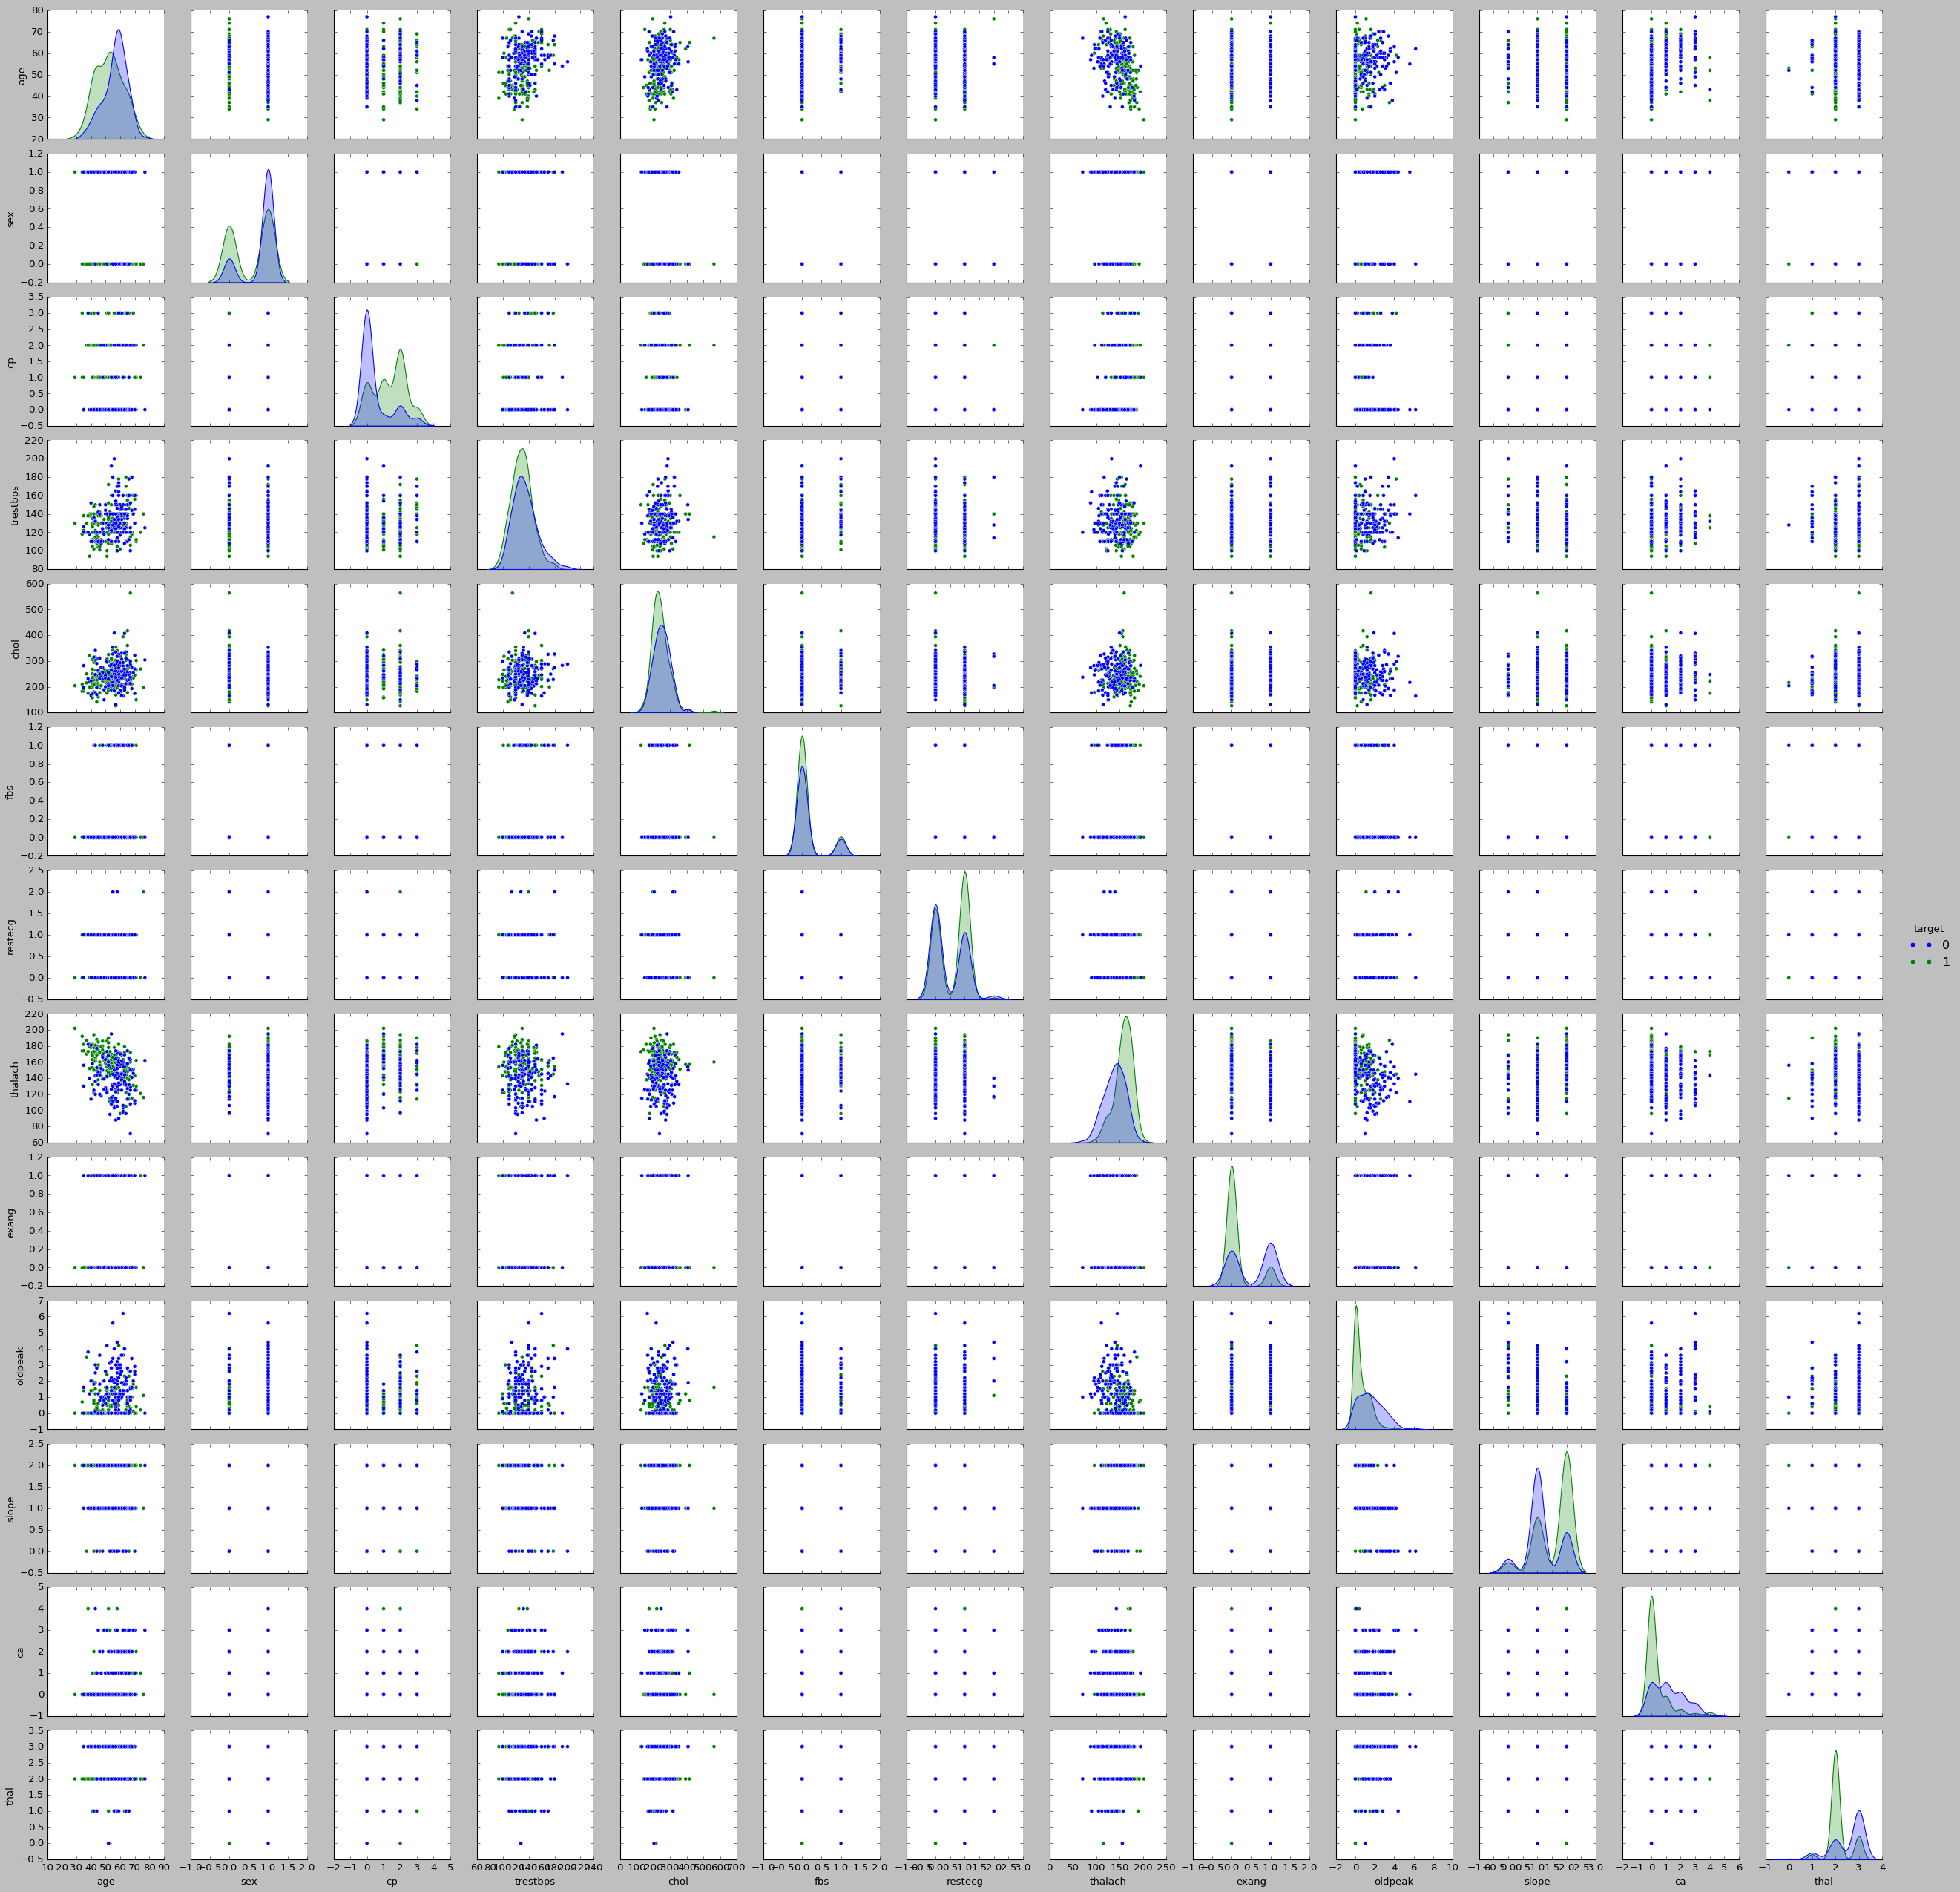

In [124]:
sns.pairplot(df, hue = 'target')
plt.show()

In [125]:
X = df.drop('target', axis = 1)
y = df['target']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
pd.DataFrame(X_train_scaled).describe().round(2)

0       1       2       3       4       5       6       7       8   \
count  212.00  212.00  212.00  212.00  212.00  212.00  212.00  212.00  212.00   
mean     0.00    0.00    0.00    0.00    0.00   -0.00   -0.00    0.00    0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -2.76   -1.39   -0.98   -2.15   -2.14   -0.38   -1.03   -2.74   -0.69   
25%     -0.72   -1.39   -0.98   -0.62   -0.67   -0.38   -1.03   -0.66   -0.69   
50%      0.07    0.72   -0.01   -0.03   -0.13   -0.38    0.87    0.17   -0.69   
75%      0.73    0.72    0.95    0.56    0.52   -0.38    0.87    0.79    1.46   
max      2.47    0.72    1.92    3.62    5.81    2.62    2.77    2.28    1.46   

           9       10      11      12  
count  212.00  212.00  212.00  212.00  
mean     0.00    0.00    0.00    0.00  
std      1.00    1.00    1.00    1.00  
min     -0.93   -2.31   -0.68   -3.92  
25%     -0.93   -0.68   -0.68   -0.55  
50%     -0.20   -0.68   -0.68   -0.55  
75%      0.54    0.96    0.38    1.14  
max      4.21    0.96    3.54    1.14

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [132]:
# Define models
models = {
    'Logistic Regression' : LogisticRegression(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Support Vector Machine' : SVC(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'AdaBoost' : AdaBoostClassifier()
}

In [133]:
# Train and evaluate models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
results = {}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  acc = accuracy_score(y_test, y_pred)
  results[name] = acc
  print(f'\n{name} Classification Report:')
  print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82    

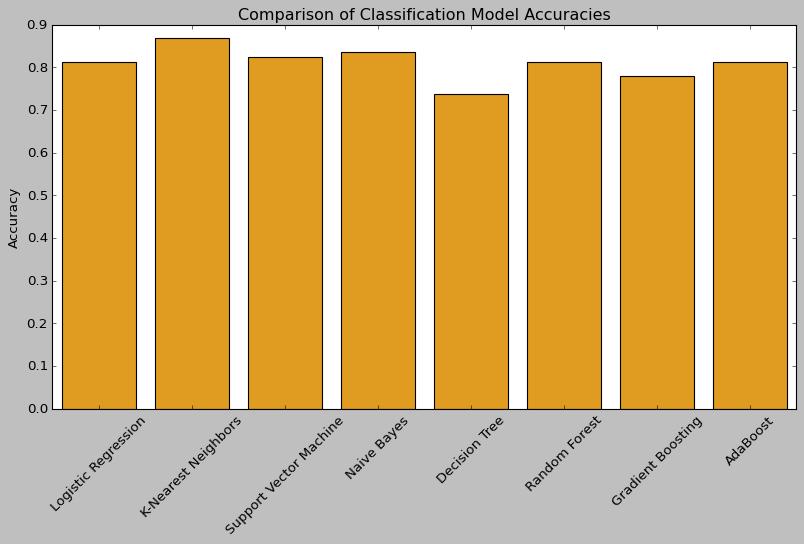

In [136]:
plt.figure(figsize = (12, 6))
sns.barplot(x = list(results.keys()),y = list(results.values()), color = 'orange')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)
plt.title('Comparison of Classification Model Accuracies')
plt.show()

# 8. E2 Association Rules

In [1]:
# 8. E2 Association Rules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Groceries_dataset.csv')
df.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
print(f'Number of Unique items: {df["itemDescription"].nunique()}')

Number of Unique items: 167


In [6]:
# Top 10 most frequently purchased items
top_10_items = df['itemDescription'].value_counts().head(10)
print(top_10_items)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64


<ipython-input-8-e64962bf417f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_items.values, y = top_10_items.index, palette = 'viridis')


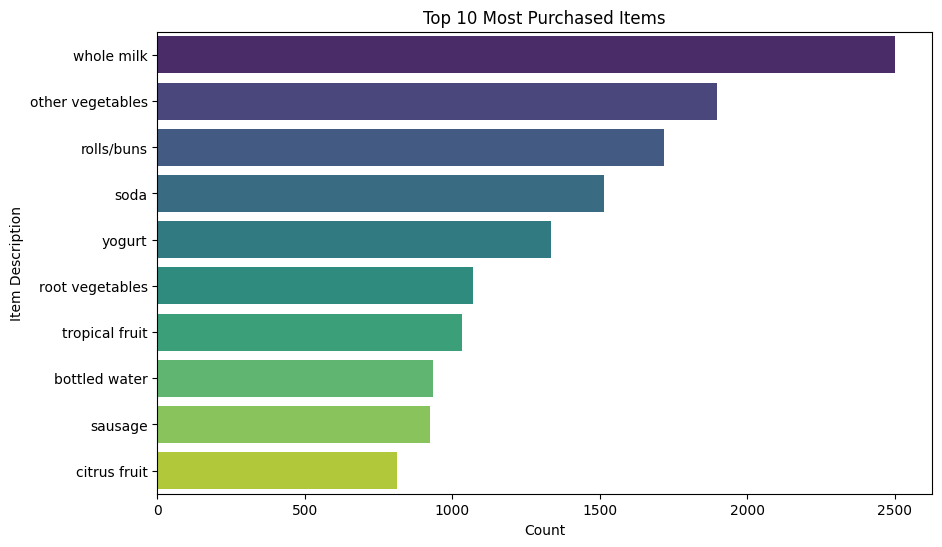

In [8]:
# plot top 10 most purchased items
plt.figure(figsize = (10,6))
sns.barplot(x = top_10_items.values, y = top_10_items.index, palette = 'viridis')
plt.xlabel('Count')
plt.ylabel('Item Description')
plt.title('Top 10 Most Purchased Items')
plt.show()

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

# Transactions per month
monthly_transactions = df.groupby(df['Date'].dt.to_period('M')).size()
print(monthly_transactions)

Date
2014-01    1527
2014-02    1437
2014-03    1411
2014-04    1561
2014-05    1615
2014-06    1570
2014-07    1576
2014-08    1575
2014-09    1472
2014-10    1591
2014-11    1469
2014-12    1473
2015-01    1797
2015-02    1560
2015-03    1722
2015-04    1699
2015-05    1793
2015-06    1694
2015-07    1724
2015-08    1921
2015-09    1587
2015-10    1670
2015-11    1785
2015-12    1536
Freq: M, dtype: int64


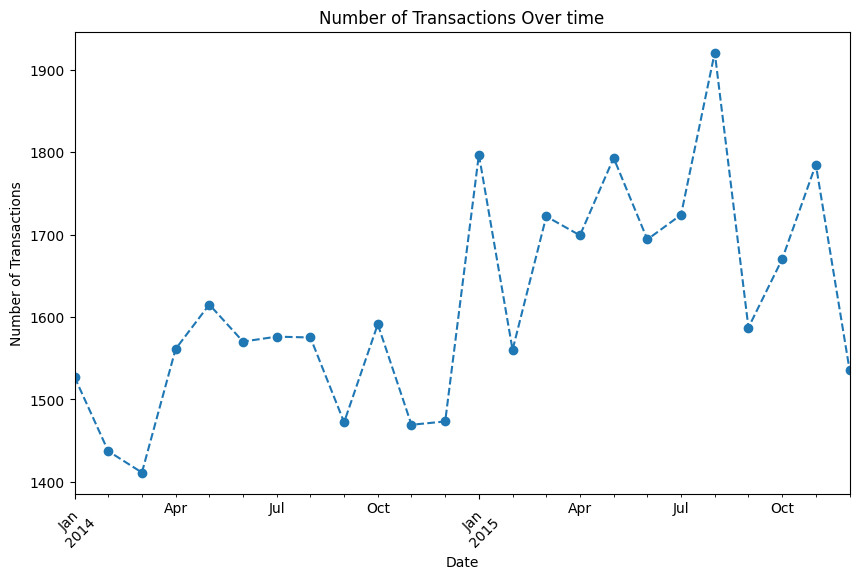

In [12]:
# Plot transactions over time

plt.figure(figsize = (10,6))
monthly_transactions.plot(marker = 'o', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over time')
plt.xticks(rotation = 45)
plt.show()

In [13]:
# Transactions per weekday
weekday_transactions = df['Date'].dt.day_name().value_counts()
print(weekday_transactions)

Date
Thursday     5620
Friday       5562
Wednesday    5562
Tuesday      5558
Saturday     5551
Sunday       5530
Monday       5382
Name: count, dtype: int64


<ipython-input-14-ad7dcaceb8ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = weekday_transactions.index, y = weekday_transactions.values, palette = 'viridis')


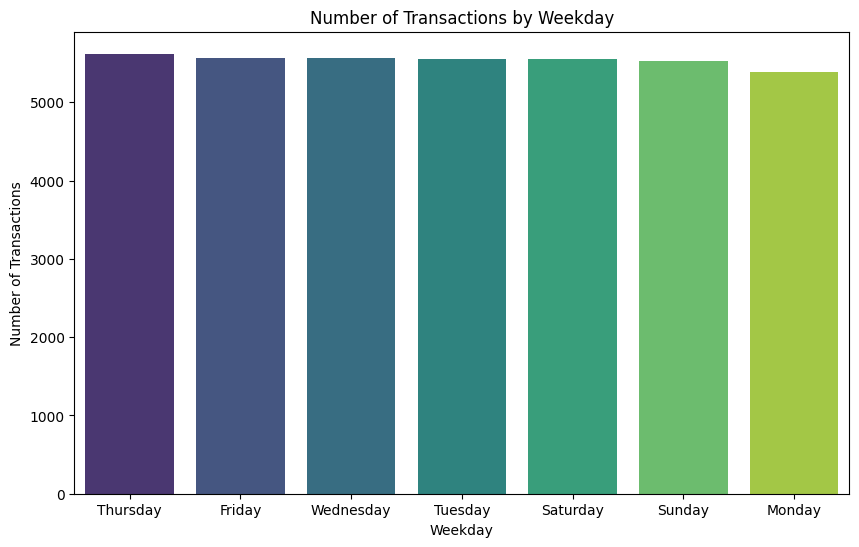

In [14]:
# Plot transactions by weekday
plt.figure(figsize = (10,6))
sns.barplot(x = weekday_transactions.index, y = weekday_transactions.values, palette = 'viridis')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Weekday')
plt.show()

In [21]:
# Group transactions by Member_numbe and Date
grouped_transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)

# Convert transactions to list format
transactions = grouped_transactions.tolist()

In [22]:
# Encode transactions into one-hot format

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns = te.columns_)

In [24]:
# Apply Apriori algorithm to find frequent itemsets
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df_encoded, min_support = 0.005, use_colnames = True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)

# Display top 5 association rules
print(f'Top 5 Association Rules : {rules.head()}')

Top 5 Association Rules :           antecedents         consequents  antecedent support  \
0  (other vegetables)       (frankfurter)            0.122101   
1       (frankfurter)  (other vegetables)            0.037760   
2              (soda)           (sausage)            0.097106   
3           (sausage)              (soda)            0.060349   
4            (yogurt)           (sausage)            0.085879   

   consequent support   support  confidence      lift  representativity  \
0            0.037760  0.005146    0.042146  1.116150               1.0   
1            0.122101  0.005146    0.136283  1.116150               1.0   
2            0.060349  0.005948    0.061253  1.014975               1.0   
3            0.097106  0.005948    0.098560  1.014975               1.0   
4            0.060349  0.005748    0.066926  1.108986               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.000536    1.004579       0.118536  0.033261   0.00455

# 9. KNN Algorithm

In [26]:
# 9. KNN Algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [27]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  custcat  
0         0       2        1  
1         0       6        4  
2         1       2        3  
3         1       1        1  
4         0       4        3  
..      ...     ...      ...  
995       1       3        1  
996       1       1        1  
997       1       1        4  
998       1       1        3  
999       1       3        2  

[1000 rows x 12 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [30]:
print(df['custcat'].value_counts())

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64


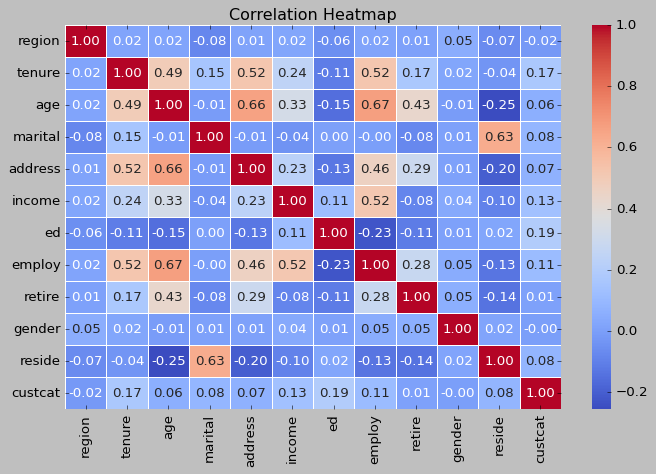

In [34]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
corr_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending = False)
print(corr_values)

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64


In [36]:
X = df.drop('custcat', axis = 1)
y = df['custcat']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [61]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 35.67%
Confusion Matrix: 
[[43 15 19  6]
 [19 14 17 15]
 [25 18 32  8]
 [26 14 11 18]]


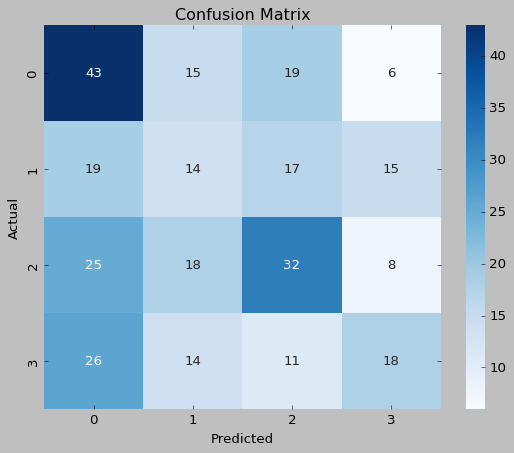

Classification Report: 
              precision    recall  f1-score   support

           1       0.38      0.52      0.44        83
           2       0.23      0.22      0.22        65
           3       0.41      0.39      0.40        83
           4       0.38      0.26      0.31        69

    accuracy                           0.36       300
   macro avg       0.35      0.34      0.34       300
weighted avg       0.36      0.36      0.35       300



In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

In [63]:
# Find optimal value of K
Ks = 100
acc = np.zeros(Ks)
std_acc = np.zeros(Ks)
for n in range(1, Ks+1):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  acc[n-1] = accuracy_score(y_test, y_pred)
  std_acc[n-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

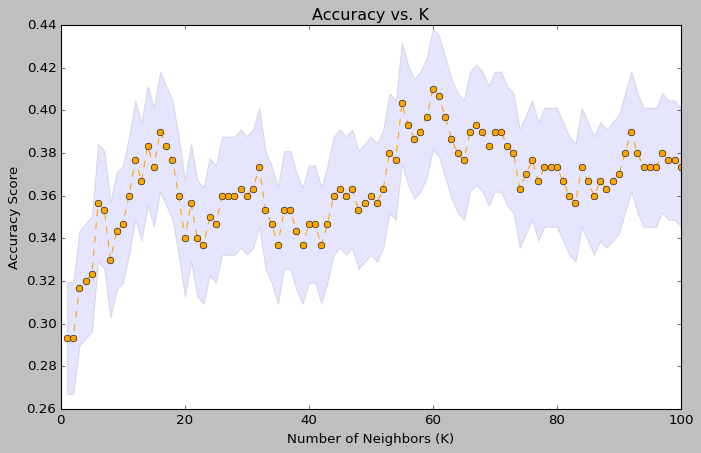

In [64]:
# Plot k vs accuracy
plt.figure(figsize = (10,6))
plt.plot(range(1, Ks+1), acc, color = 'orange', linestyle = '--', marker = 'o')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs. K')
plt.show()

In [65]:
print(f'The best accuracy was with {acc.max()} with k = {acc.argmax() + 1}')

The best accuracy was with 0.41 with k = 60


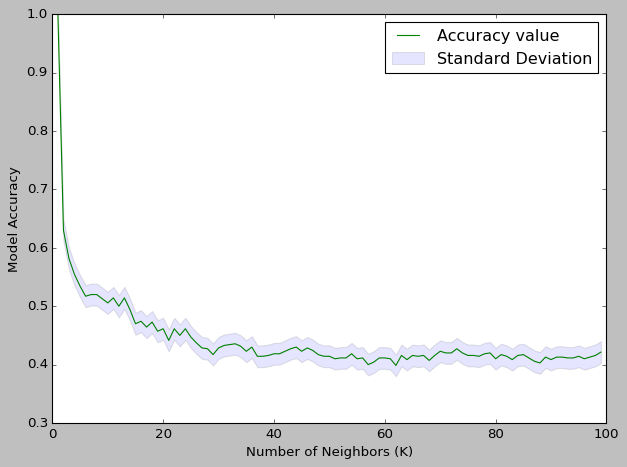

In [68]:
# Variation of the accuracy score for the training set for 100 value of Ks.

Ks =100
acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
    yhat = knn_model_n.predict(X_train_scaled)
    acc[n-1] = accuracy_score(y_train, yhat)
    std_acc[n-1] = np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),acc,'g')
plt.fill_between(range(1,Ks),acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# 10. Naive Bayes (GaussianNB)

# 11. DecisionTreeClassifier

In [69]:
# 11. DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')

In [74]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')
df.head()


Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [76]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['Sex'] = Le.fit_transform(df['Sex'])
df['BP'] = Le.fit_transform(df['BP'])
df['Cholesterol'] = Le.fit_transform(df['Cholesterol'])
df.head()

Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY

In [77]:
custom_map = {'drugA':0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
df['Drug_Num'] = df['Drug'].map(custom_map)
df.head()

Age  Sex  BP  Cholesterol  Na_to_K   Drug  Drug_Num
0   23    0   0            0   25.355  drugY         4
1   47    1   1            0   13.093  drugC         2
2   47    1   1            0   10.114  drugC         2
3   28    0   2            0    7.798  drugX         3
4   61    0   1            0   18.043  drugY         4

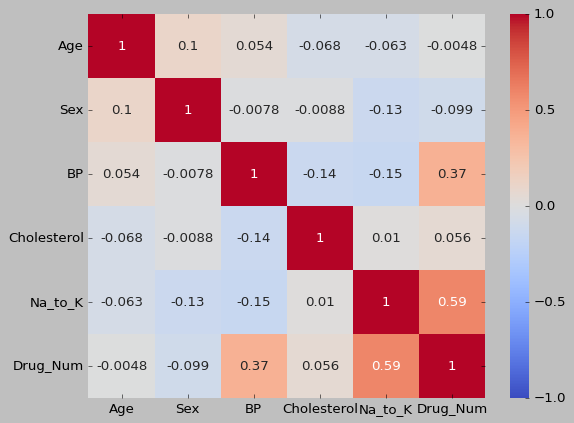

In [79]:
sns.heatmap(df.drop('Drug',axis = 1).corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show()

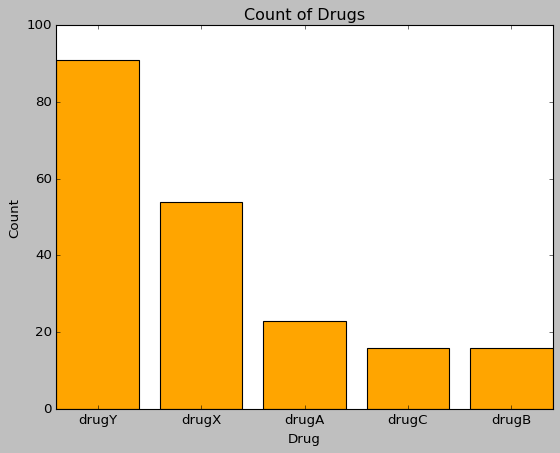

In [80]:
category_count = df['Drug'].value_counts()

plt.bar(category_count.index, category_count.values, color = 'orange')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Count of Drugs')
plt.show()

In [81]:
X = df.drop(['Drug', 'Drug_Num'], axis = 1)
y = df['Drug']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [90]:
y_pred = tree.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Accuracy Score : 0.9833333333333333


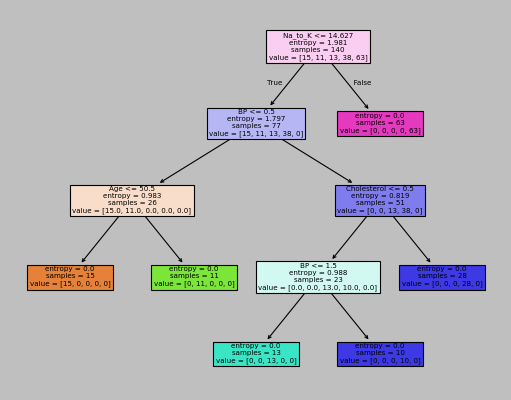

In [92]:
plot_tree(tree, filled = True, feature_names = X.columns)
plt.show()